In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


C:\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Load the Spambase dataset from OpenML
spambase = fetch_openml(name="spambase", version=1)


In [14]:
# data (as pandas dataframes)
X = spambase.data
y = spambase.target


In [5]:
# Step 3: Handle missing values
# Assuming missing values are represented by 0, replace them with the mean of the respective columns
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)



In [6]:
# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Step 5: Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Step 6: Train the models
# 6.1 MLP
print("Training MLP...")
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp_classifier.fit(X_train, y_train)
print("MLP Training Completed")

# 6.2 SVM
print("Training SVM...")
svm_classifier = SVC(kernel='linear', C=1)
svm_classifier.fit(X_train, y_train)
print("SVM Training Completed")

# 6.3 Ensemble (Random Forest)
print("Training Ensemble (Random Forest)...")
ensemble_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
ensemble_classifier.fit(X_train, y_train)
print("Ensemble (Random Forest) Training Completed")

# 6.4 Decision Tree
print("Training Decision Tree...")
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X_train, y_train)
print("Decision Tree Training Completed")

Training MLP...
MLP Training Completed
Training SVM...
SVM Training Completed
Training Ensemble (Random Forest)...
Ensemble (Random Forest) Training Completed
Training Decision Tree...
Decision Tree Training Completed


In [9]:
# Step 7: Evaluate the models
# 7.1 MLP
mlp_predictions = mlp_classifier.predict(X_test)
mlp_accuracy = accuracy_score(y_test, mlp_predictions)
mlp_report = classification_report(y_test, mlp_predictions)

# 7.2 SVM
svm_predictions = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_report = classification_report(y_test, svm_predictions)

# 7.3 Ensemble
ensemble_predictions = ensemble_classifier.predict(X_test)
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
ensemble_report = classification_report(y_test, ensemble_predictions)

# 7.4 Decision Tree
decision_tree_predictions = decision_tree_classifier.predict(X_test)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
decision_tree_report = classification_report(y_test, decision_tree_predictions)


In [10]:
# Print or store the evaluation results
print("MLP Accuracy:", mlp_accuracy)
print("MLP Classification Report:\n", mlp_report)

print("SVM Accuracy:", svm_accuracy)
print("SVM Classification Report:\n", svm_report)

print("Ensemble Accuracy:", ensemble_accuracy)
print("Ensemble Classification Report:\n", ensemble_report)

print("Decision Tree Accuracy:", decision_tree_accuracy)
print("Decision Tree Classification Report:\n", decision_tree_report)

MLP Accuracy: 0.9554831704668838
MLP Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       531
           1       0.96      0.93      0.95       390

    accuracy                           0.96       921
   macro avg       0.96      0.95      0.95       921
weighted avg       0.96      0.96      0.96       921

SVM Accuracy: 0.9261672095548317
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94       531
           1       0.94      0.89      0.91       390

    accuracy                           0.93       921
   macro avg       0.93      0.92      0.92       921
weighted avg       0.93      0.93      0.93       921

Ensemble Accuracy: 0.9554831704668838
Ensemble Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       531
           1       0.98      0.92      0.95 

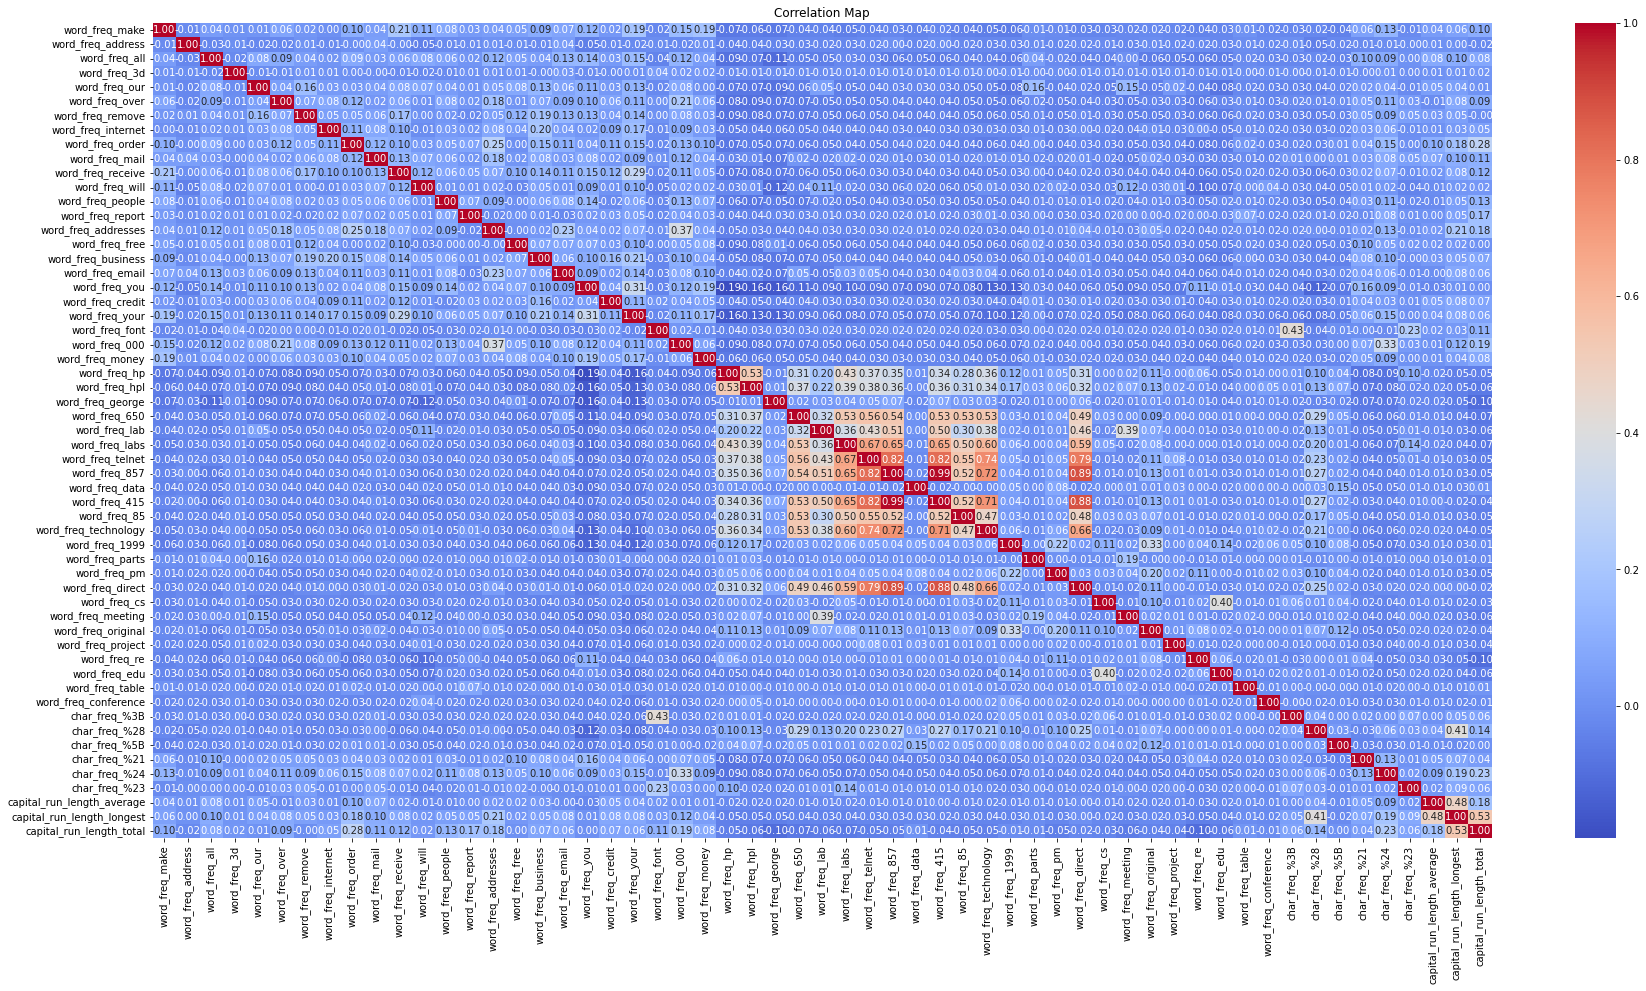

In [11]:
# Combine the features and target variable for correlation analysis
correlation_data = pd.DataFrame(X_train, columns=['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_%3B', 'char_freq_%28', 'char_freq_%5B', 'char_freq_%21', 'char_freq_%24', 'char_freq_%23', 'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total'])

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Create a heatmap
plt.figure(figsize=(30, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Map')
plt.show()

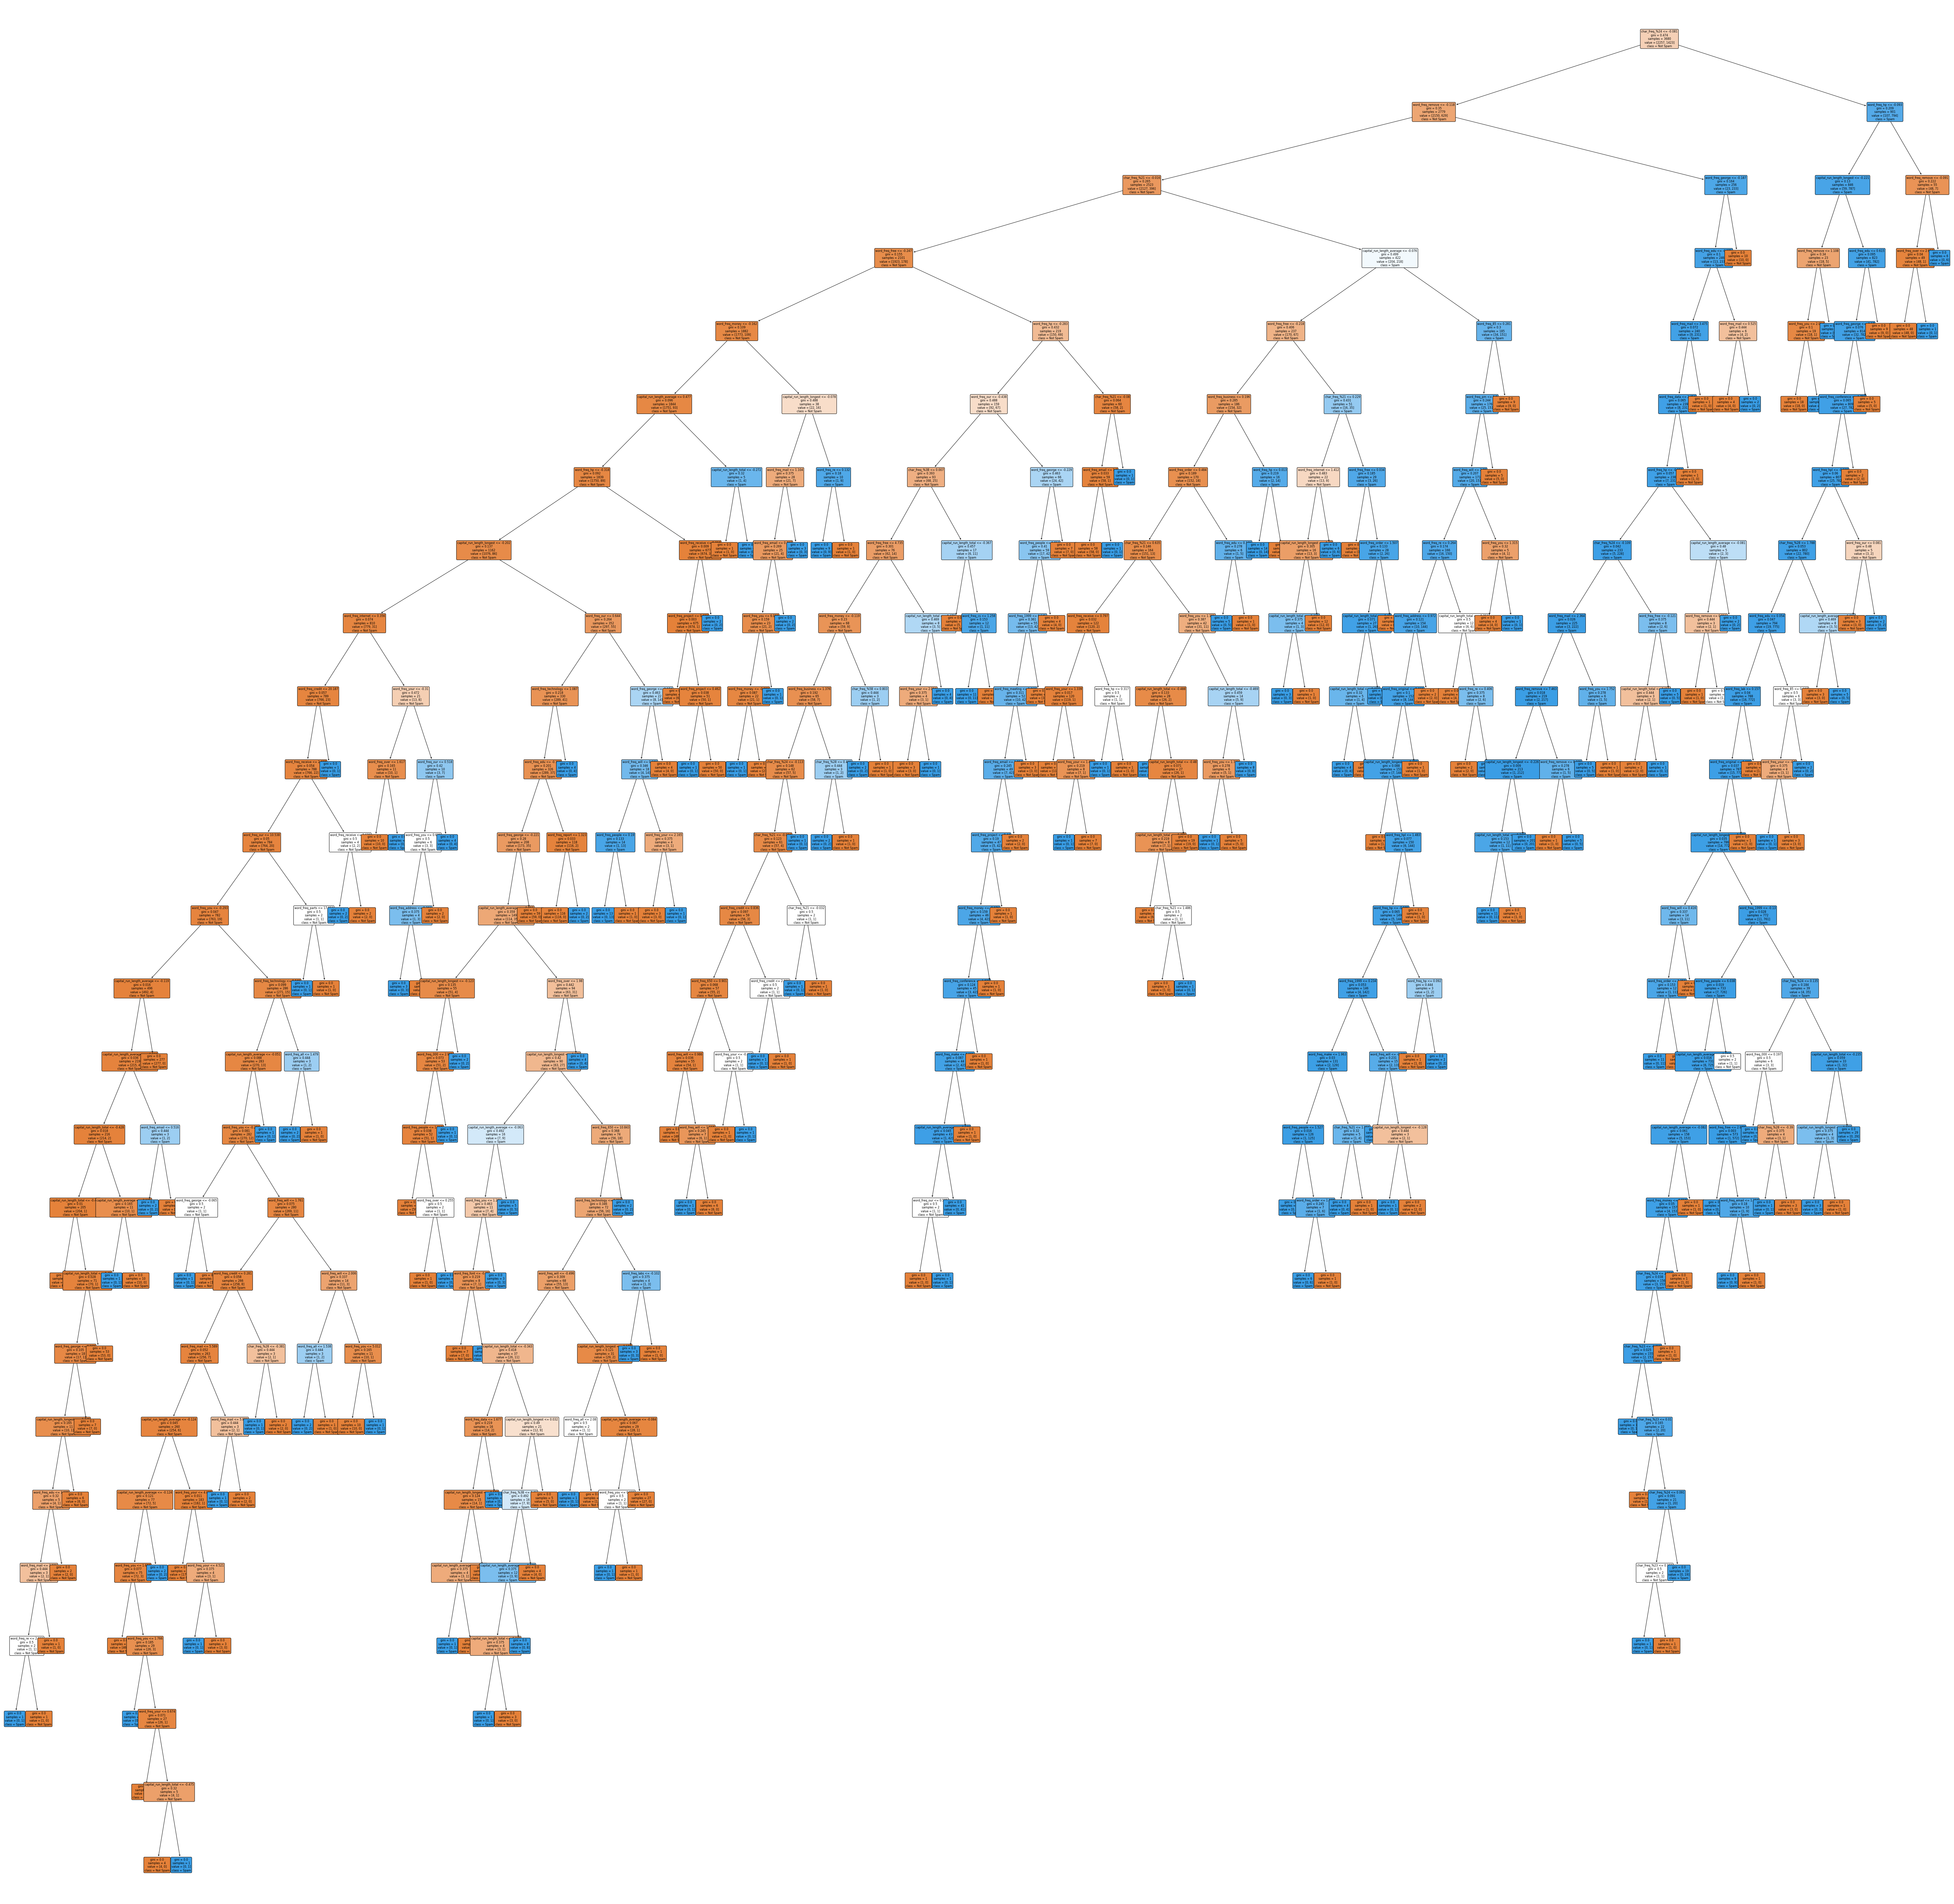

In [15]:
# Assuming feature_names is a list of column names
feature_names = X.columns

# Visualize the decision tree
plt.figure(figsize=(100, 100))

plot_tree(decision_tree_classifier, filled=True, feature_names=feature_names, class_names=['Not Spam', 'Spam'], rounded=True, fontsize=8)
plt.show()